# OCR tables and parse the output

In this tutorial, we will illustrate how easily the `layoutparser` APIs can be used for  

1. Recognizing texts in images and store the results with the specified OCR engine
2. Postprocessing of the textual results to create structured data 


In [1]:
!pip install layoutparser
!pip install "layoutparser[ocr]"

!apt install tesseract-ocr
!apt install libtesseract-dev
#install and restart 

     |████████████████████████████████| 19.2 MB 662 kB/s 
     |████████████████████████████████| 596 kB 56.0 MB/s 
     |████████████████████████████████| 46 kB 3.9 MB/s 
     |████████████████████████████████| 5.6 MB 18.1 MB/s 
     |████████████████████████████████| 4.3 MB 40.4 MB/s 
     |████████████████████████████████| 139 kB 46.4 MB/s 
     |████████████████████████████████| 3.6 MB 45.3 MB/s 
  Created wheel for pdfplumber: filename=pdfplumber-0.6.0-py3-none-any.whl size=33688 sha256=4c646d281697ffc78303fbd64e367d8fba24b9a890eb65f46e8715f972881a00
  Stored in directory: /root/.cache/pip/wheels/58/56/fe/2e93d842ffa9ea97746c1ab253d43502ed61c0689361a0224e
Successfully built pdfplumber
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


     |████████████████████████████████| 435 kB 5.1 MB/s 
  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14070 sha256=f56fa4d6459f7ffb2abead54b4d56af3e092c0096ef1dc47be3c3aae1d9697b6
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,093 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 155229 files and directories currently installed.)
Preparing to unpack .../tesserac

In [1]:
import layoutparser as lp 

import matplotlib.pyplot as plt
%matplotlib inline 

import pandas as pd
import numpy as np
import cv2

## Initiate GCV OCR engine and check the image 

Currently, `layoutparser` supports two types of OCR engines: Google Cloud Vision and Tesseract OCR engine. And we are going to provide more support in the future. In this toturial, we will use the Google Cloud Vision engine as an example.

In [2]:
#mount 
! ls 

drive  sample_data


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
! ls "/content/drive/MyDrive/SuperAI/OCR Layout/layout-parser/examples/data"
path = "/content/drive/MyDrive/SuperAI/OCR Layout/layout-parser/examples/data/"

example-table.jpeg  ocred-example-table.csv  paper-image.jpg


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving 272199607_506610750894506_7887073231510229023_n.jpg to 272199607_506610750894506_7887073231510229023_n.jpg


In [ ]:
ocr_agent = lp.GCVAgent.with_credential("/content/drive/MyDrive/SuperAI/OCR Layout/layout-parser/examples/infra-bedrock-339714-ab34f3105bbd.json", 
                                        languages = ['en'])

The `language_hints` tells the GCV which langeuage shall be used for OCRing. For a detailed explanation, please check [here](https://cloud.google.com/vision/docs/languages).

The `example-table` is a scan with complicated table structures from https://stacks.cdc.gov/view/cdc/42482/. 

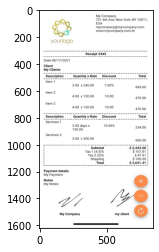

In [ ]:
image = cv2.imread("272199607_506610750894506_7887073231510229023_n.jpg")
plt.imshow(image);

## Load images and send for OCR


The `ocr_agent.detect` method can take the image array, or simply the path of the image, for OCR. By default it will return the text in the image, i.e., `text = ocr_agent.detect(image)`. 

However, as the layout is complex, the text information is not enough: we would like to directly analyze the response from GCV Engine. We can set the `return_response` to `True`. This feature is also supported for other OCR Engines like `TesseractOCRAgent`.

In [ ]:
#res = ocr_agent.detect(image, return_response=True)



In [ ]:
ocr_agent_TesseractAgent = lp.TesseractAgent(languages='eng') 



In [ ]:
text = ocr_agent_TesseractAgent.detect(path+'data/example-table.jpeg')
text

'FOR OFFICIAL\n\nUSE ONLY\n\nMAY 26, 1955\n\n \n\nNOT FOR PUBLICATION 12:00. 8008,\nDEPARTMENT OF HEALTH, EDUCATION, AND WELFARE\nPUBLIC HEALTH SERVICE COMMUNICABLE DISEASE CENTER\nPOLIOMYELITIS SURVEILLANCE UNIT\nAccepted Cases Associated with Poliomyelitis Vaccine\nDaily Supplementary Report\nDate Date Site\nPSU Ini- Date 1st lst Site 1st Lot\nCASE NO Residence tials Age Sex Inoc Symp Para Inoc Para Mfr No Renarks\nCal-27 Los Angeles SG 7 F 419 4-27 2 TA LL oC E6O37\nCal-28 Los Angeles MK 7 M 4-22 5-2 None ? None C 86037 GSF 1 cell, type 2 in stools\n5-25 (Dr. Lennette)\nCal-29 Los Angeles OM 7 F 22 5-2 ? RA LA CC B6037\nCal-~30 Oakland DE 14 Fo 4-19 4-29 5-6 LA Arms © 2 Quadriplegia\nCal-31 Riverside = RA 7 M 4-22 5-6 None RA None C 55928 CSF data not yet received\nCo\n\nCal-32 Los Angeles BB 7  M 4-20 5-3 None LA None C 6037 CSF no cells, non-peralytic\nGel-33 Long Beach DB 7 M 4-22 5-2 None ? None C 56038 CSF date not yet received\n\nE5972\nCal-34 Long Beach DA 7 M 4-22 5-1l None 

## Parse the OCR output and visualize the layout

As defined by GCV, there are two different types of output in the response: 

1. text_annotations: 

    In this format, GCV automatically find the best aggregation 
    level for the text, and return the results in a list. We can  
    use the `ocr_agent.gather_text_annotations` to reterive this 
    type of information.

2. full_text_annotations

    To support better user control, GCV also provides the 
    `full_text_annotation` output, where it returns the hierarchical 
    structure of the output text. To process this output, we provide 
    the `ocr_agent.gather_full_text_annotation` function to aggregate 
    the texts of the given aggregation level. 
    
    There are 5 levels specified in `GCVFeatureType`, namely: `PAGE`, 
    `BLOCK`, `PARA`, `WORD`, `SYMBOL`.

In [ ]:
# Alternative
res = ocr_agent.detect("272199607_506610750894506_7887073231510229023_n.jpg", return_response=True) 
texts  = ocr_agent.gather_text_annotations(res) 
    # collect all the texts without coordinates
layout = ocr_agent.gather_full_text_annotation(res, agg_level=lp.GCVFeatureType.WORD)
    # collect all the layout elements of the `WORD` level
print("==Layout")
for b in layout:
    print(b)

==Layout
TextBlock(block=Quadrilateral(points=[[422  32]
 [453  32]
 [453  58]
 [422  58]], width=31, height=26), text=My, id=0, type=None, parent=None, next=None, score=0.9900000095367432)
TextBlock(block=Quadrilateral(points=[[462  32]
 [567  33]
 [567  59]
 [462  58]], width=105, height=27), text=Company, id=1, type=None, parent=None, next=None, score=0.9900000095367432)
TextBlock(block=Quadrilateral(points=[[421  59]
 [457  59]
 [457  85]
 [421  85]], width=36, height=26), text=721, id=2, type=None, parent=None, next=None, score=0.9800000190734863)
TextBlock(block=Quadrilateral(points=[[471  59]
 [504  59]
 [504  85]
 [471  85]], width=33, height=26), text=6th, id=3, type=None, parent=None, next=None, score=0.9900000095367432)
TextBlock(block=Quadrilateral(points=[[513  59]
 [553  59]
 [553  85]
 [513  85]], width=40, height=26), text=Ave, id=4, type=None, parent=None, next=None, score=0.9900000095367432)
TextBlock(block=Quadrilateral(points=[[555  59]
 [558  59]
 [558  85]
 [555  

And we can use the `draw_box` or `draw_text` functions to quickly visualize the detected layout and text information.


These functions are highly customizable. You can change styles of the drawn boxes and texts easily. Please check the [documentation](https://layout-parser.readthedocs.io/en/latest/api_doc/visualization.html#layoutparser.visualization.draw_text) for the detailed explanation of the configurable parameters. 

As shown below, the `draw_text` function generates a visualization that:

1. it draws the detected layout with text on the left side and shows the original image on the right canvas for comparison.
2. on the text canvas (left), it also draws a red bounding box for each text region.

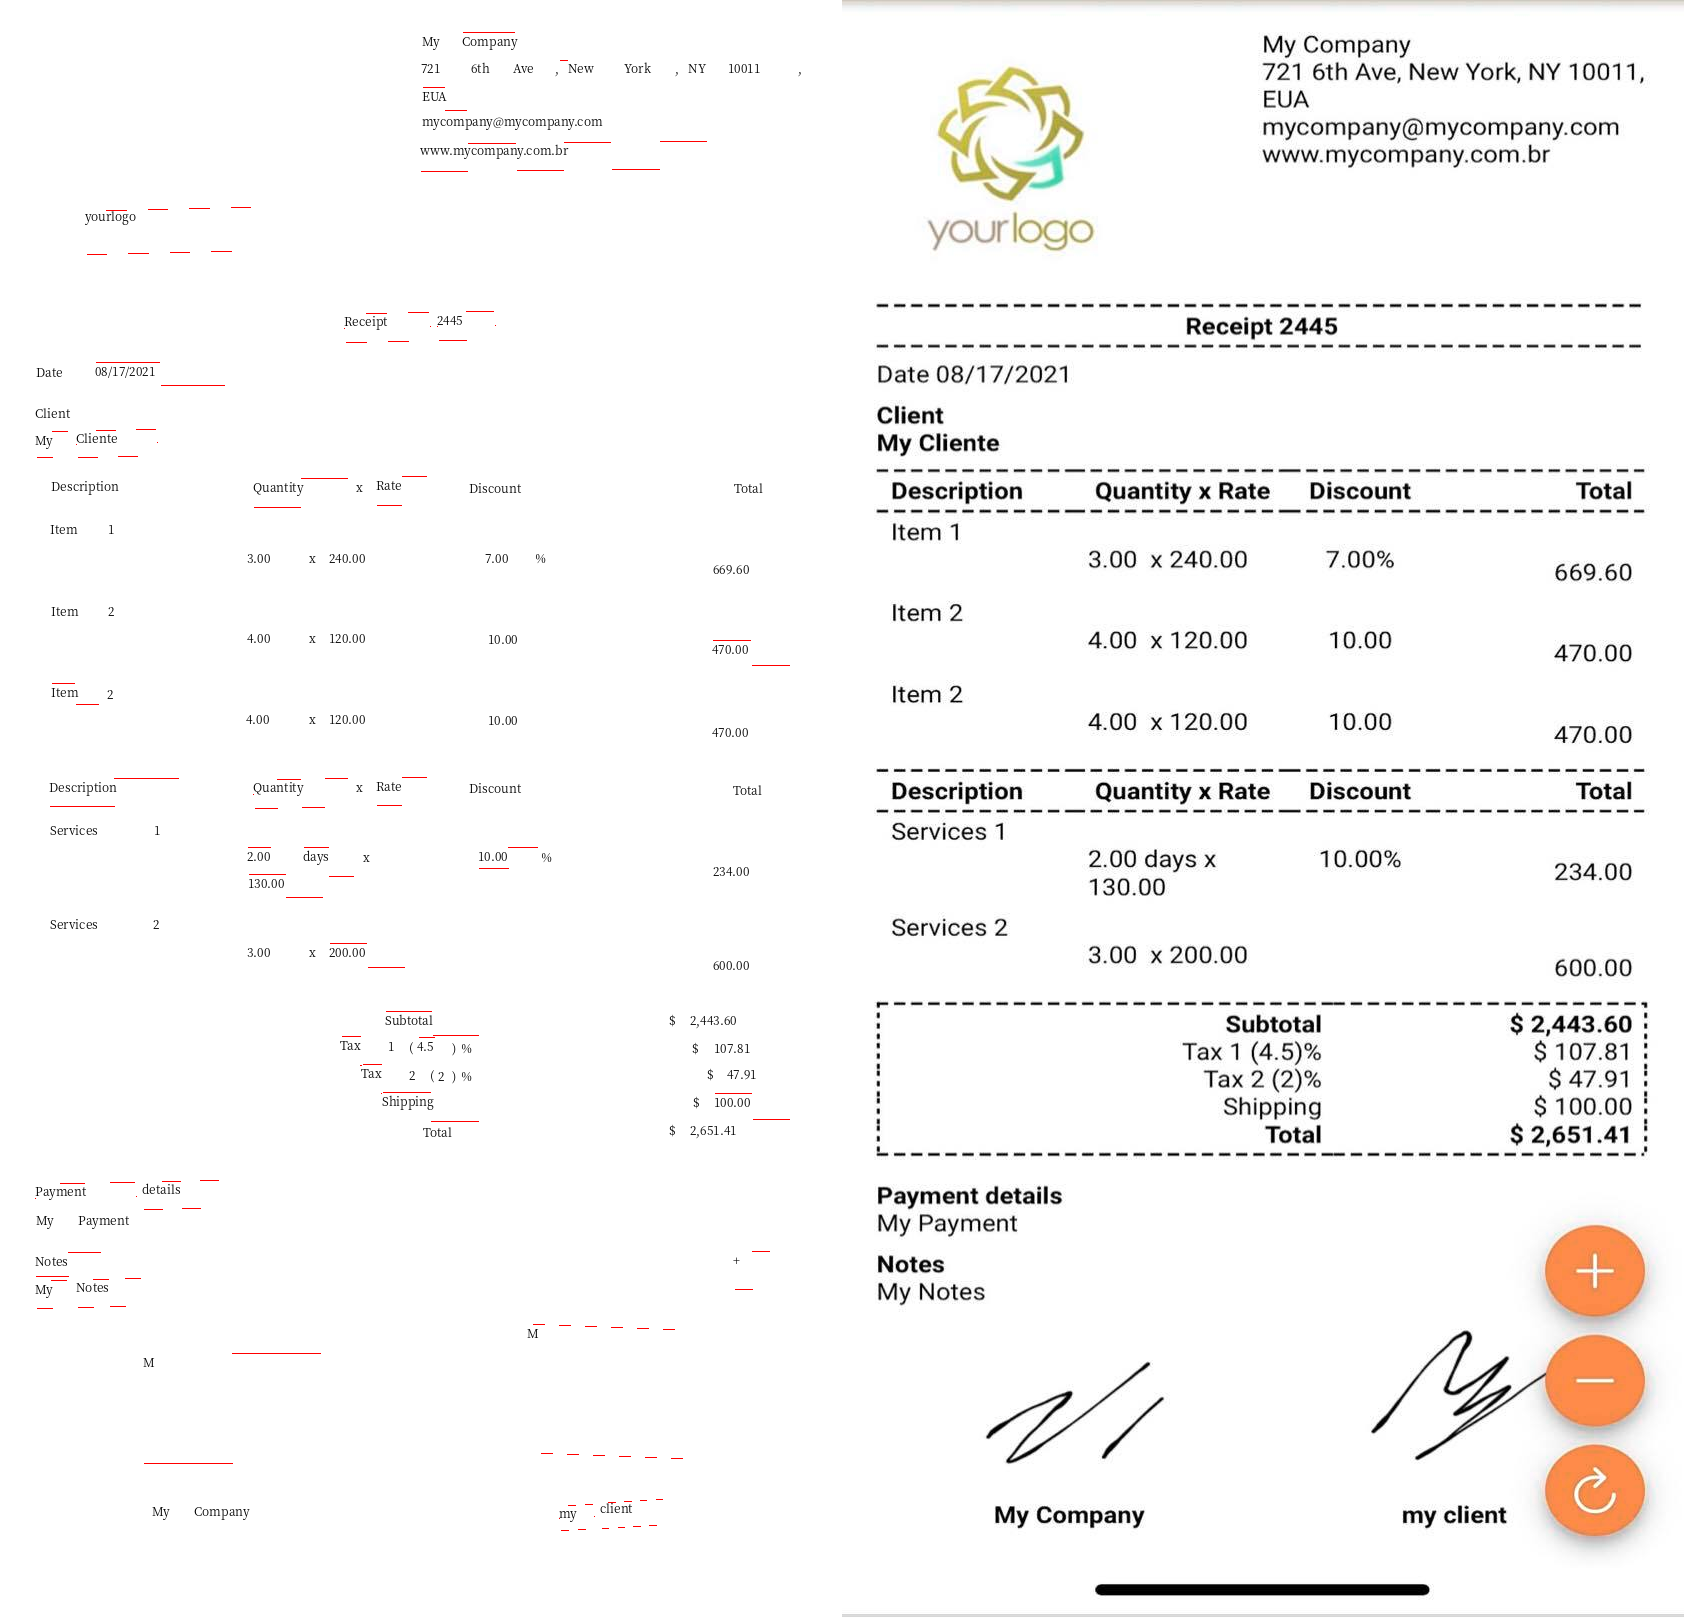

In [ ]:
lp.draw_text(image, layout, font_size=12, with_box_on_text=True,
             text_box_width=1)

## Filter the returned text blocks 

We find the coordinates of residence column are in the range of $y\in(300,833)$ and $x\in(132, 264)$. The `layout.filter_by` function can be used to fetch the texts in the region. 

Note: As the OCR engine usually does not provide advanced functions like table detection, the coordinates are found manually by using some image inspecting tools like GIMP.

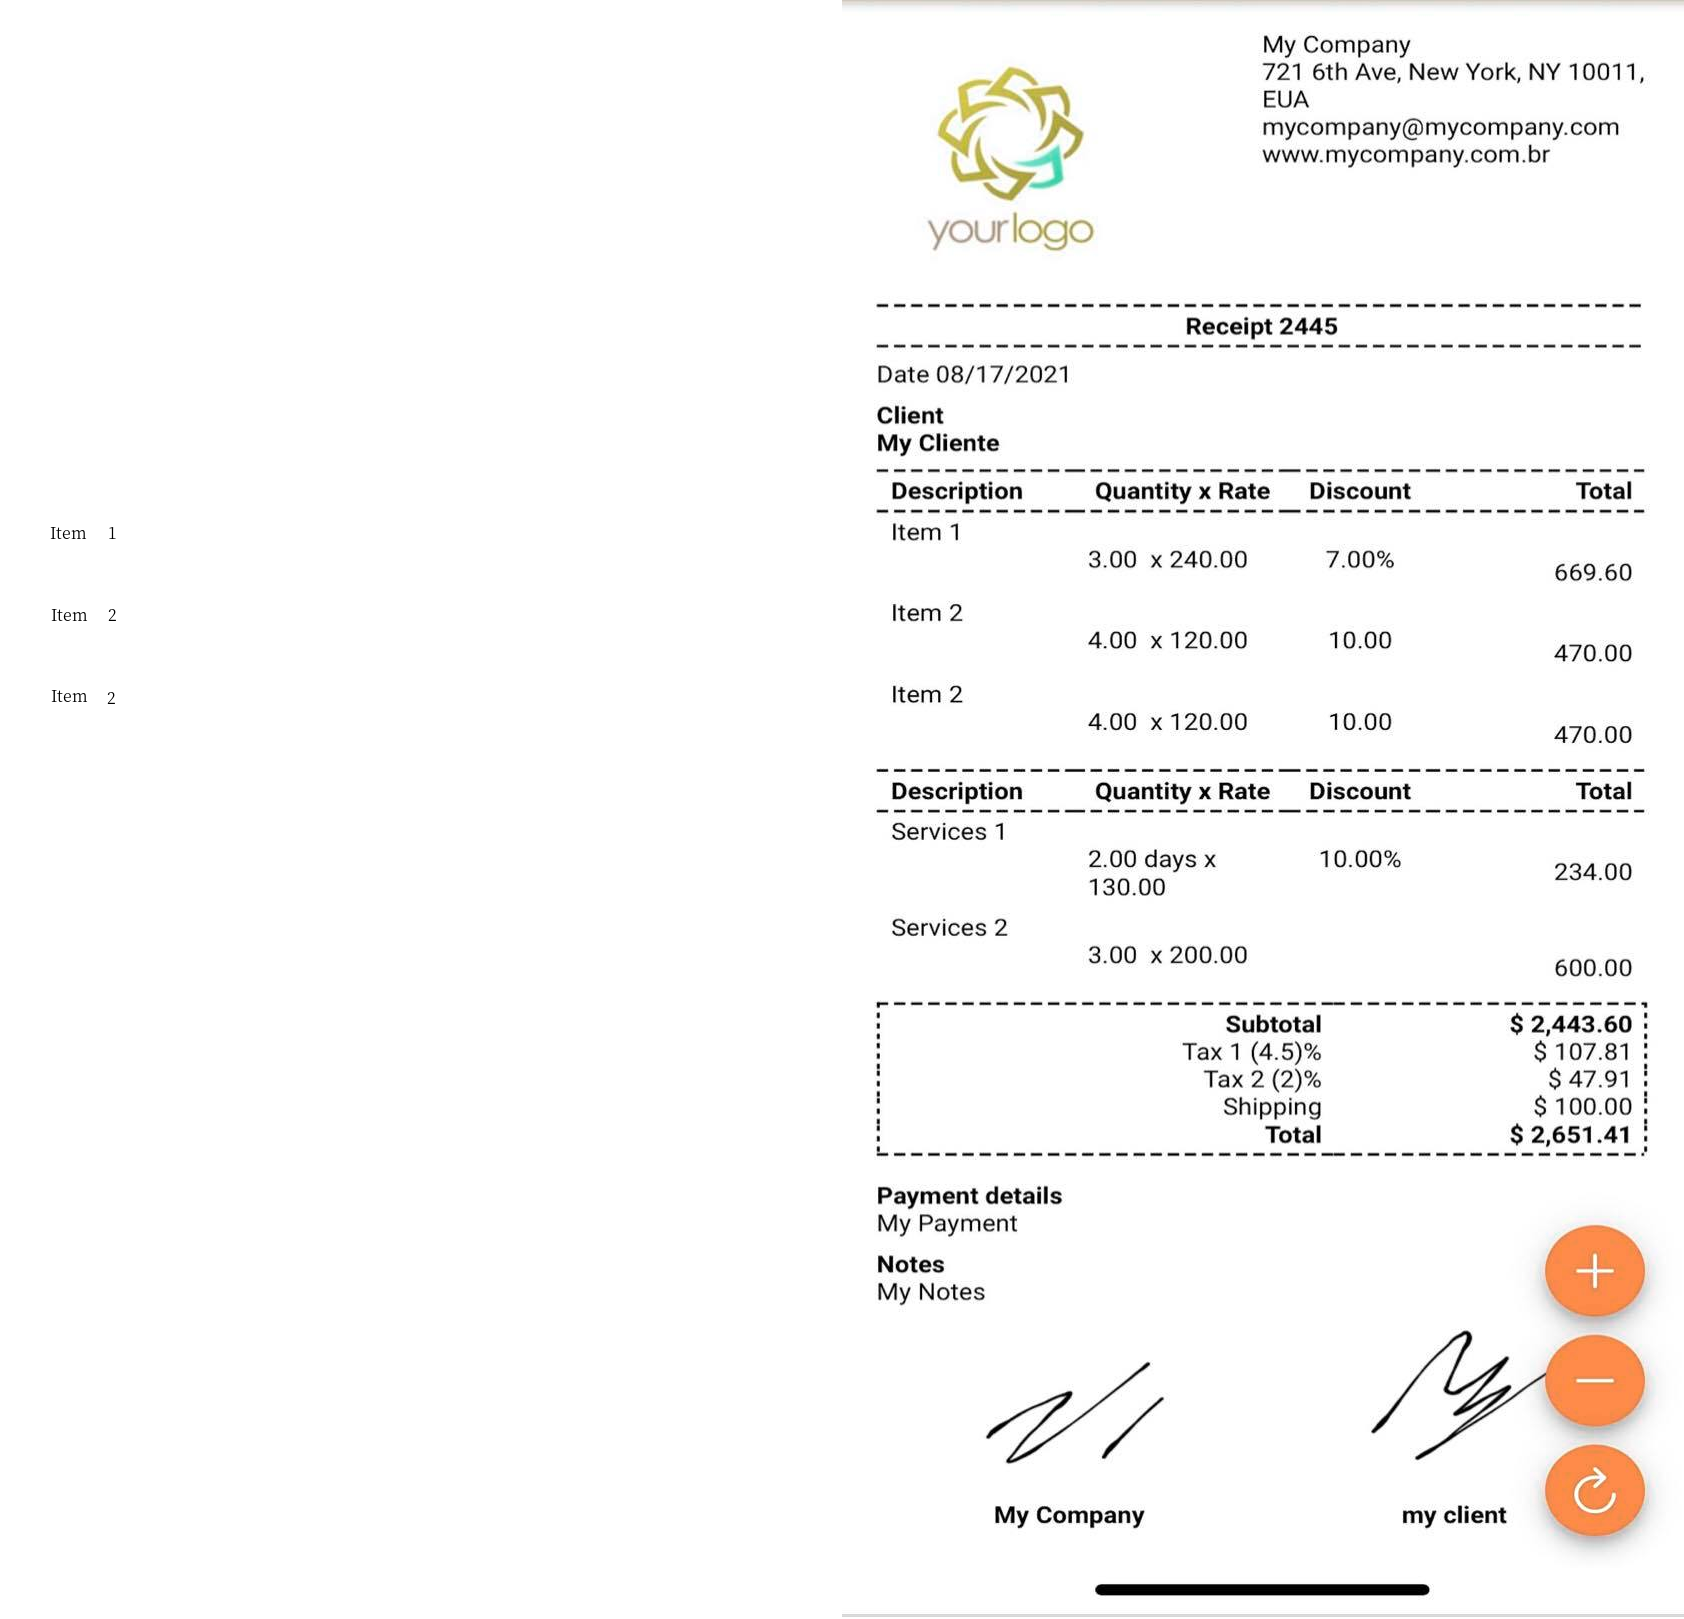

In [ ]:
filtered_residence = layout.filter_by(
    lp.Rectangle(x_1=0, y_1=500, x_2=100, y_2=750),
    soft_margin = {"left":30, "right":30} # Without it, the last 4 rows could not be included
)
lp.draw_text(image, filtered_residence, font_size=16)

And similarily, we can do that for the `lot_number` column. As sometimes there could be irregularities in the layout as well as the OCR outputs, the `layout.filter_by` function also supports a `soft_margin` argument to handle this issue and generate more robust outputs. 


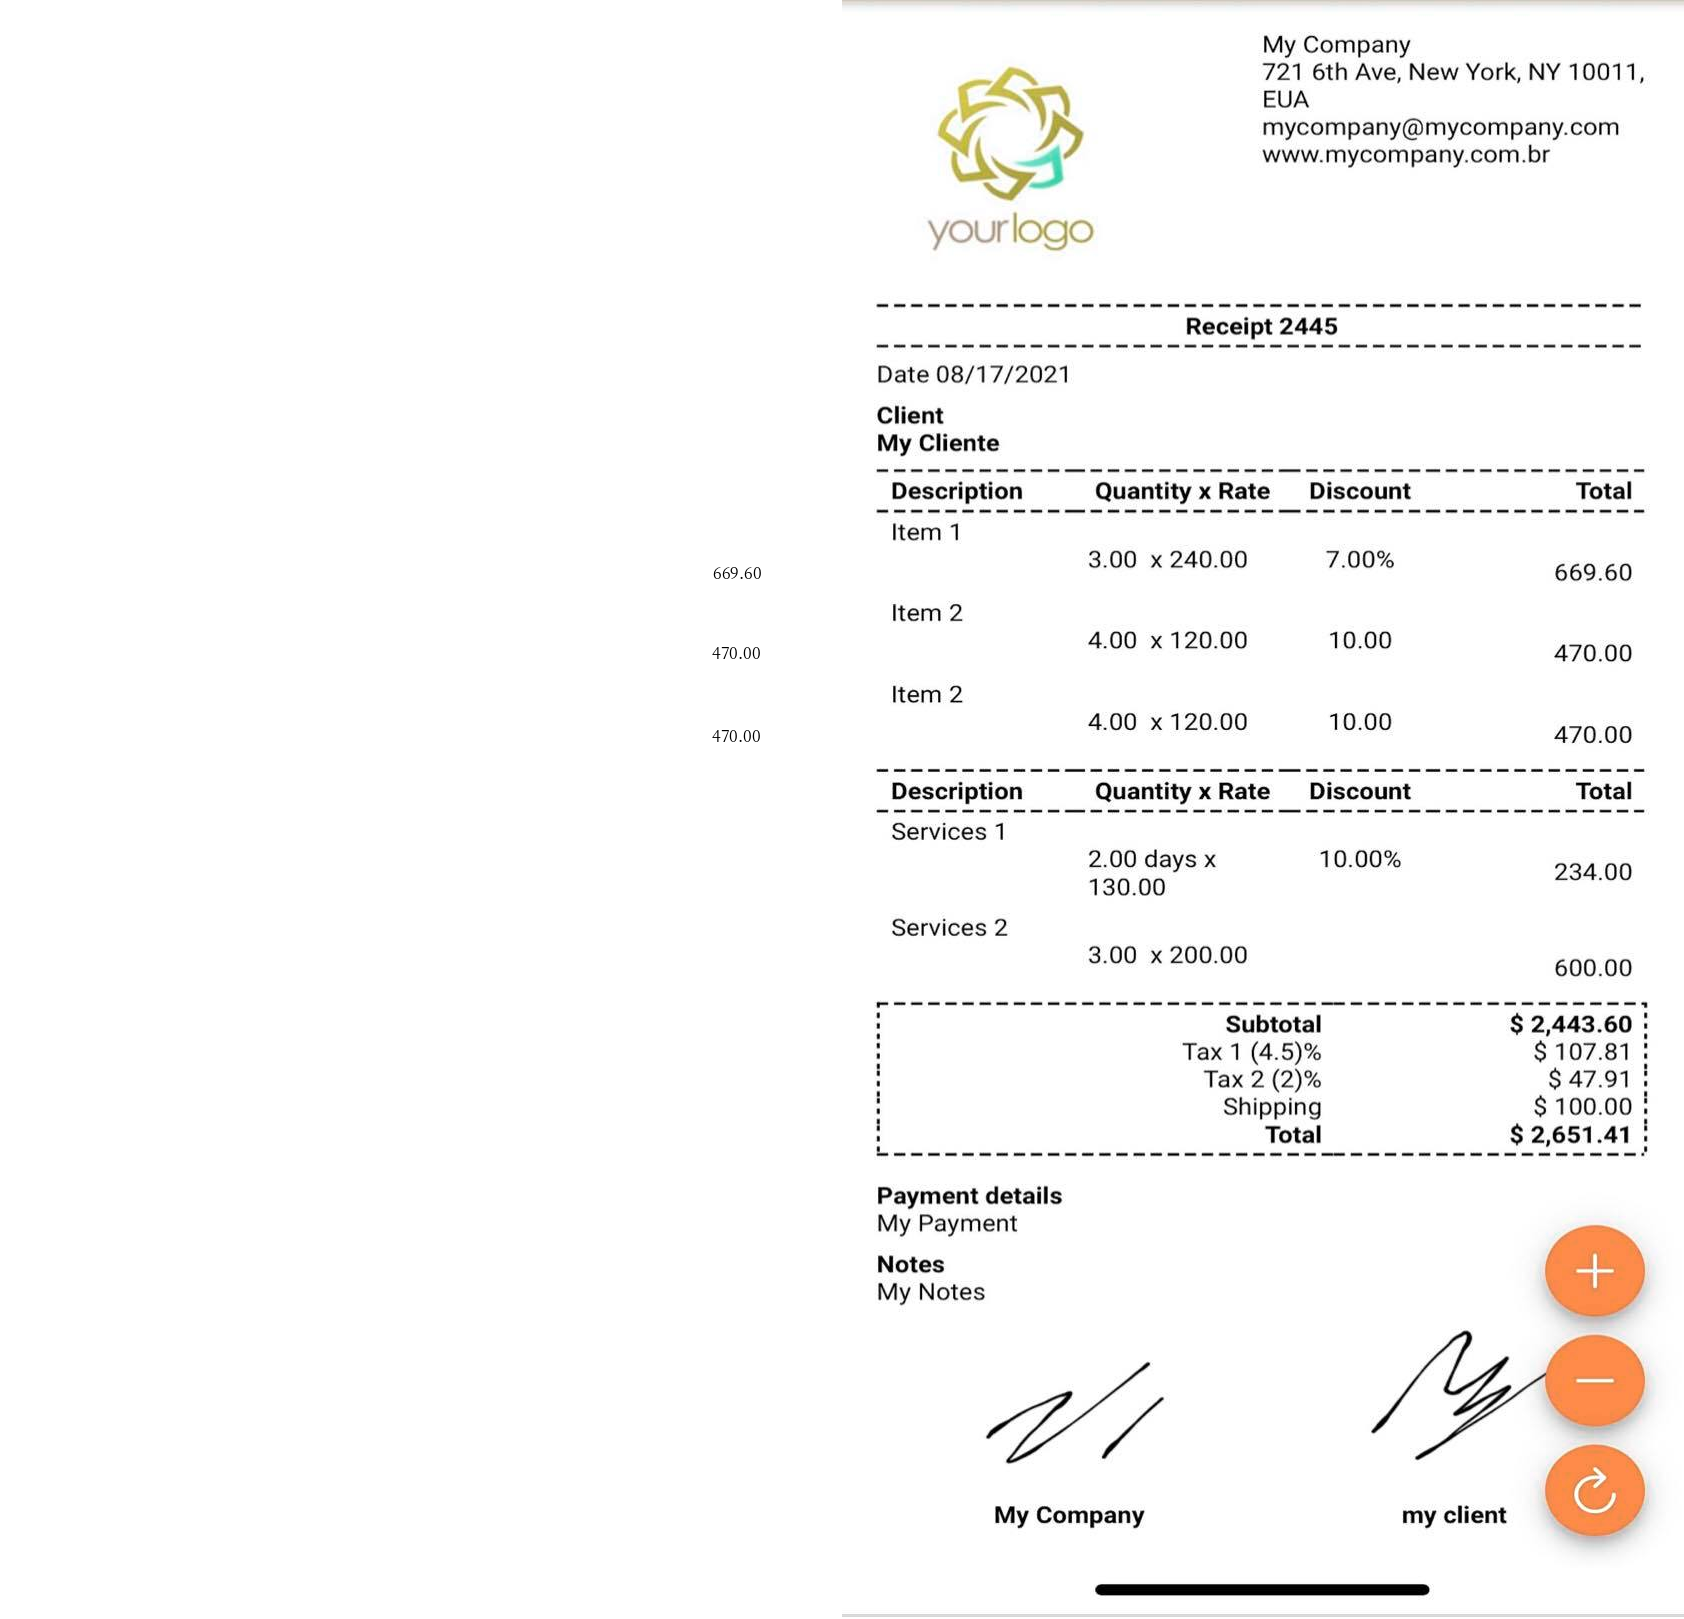

In [ ]:
filter_lotno = layout.filter_by(
    
    lp.Rectangle(x_1=700, y_1=500, x_2=800, y_2=750),
    soft_margin = {"left":10, "right":20} # Without it, the last 4 rows could not be included
)
lp.draw_text(image, filter_lotno, font_size=16)

### Group Rows based on hard-coded parameteres

As there are 13 rows, we can iterate the rows and fetch the row-based information:

In [ ]:
y_0 = 500
n_rows = 3
height = 75
y_1 = y_0+n_rows*height

row = []
for y in range(y_0, y_1, height):
    
    interval = lp.Interval(y,y+height, axis='y')
    residence_row = filtered_residence.\
        filter_by(interval).\
        get_texts()
    y2 = y + 50
    interval = lp.Interval(y2,y2+height, axis='y')
    lotno_row = filter_lotno.\
        filter_by(interval).\
        get_texts()
    
    row.append([''.join(residence_row), ''.join(lotno_row)])

In [ ]:
row

[['Item1', '669.60'], ['Item2', '470.00'], ['Item2', '470.00']]

### An Alternative Method - Adaptive Grouping lines based on distances 

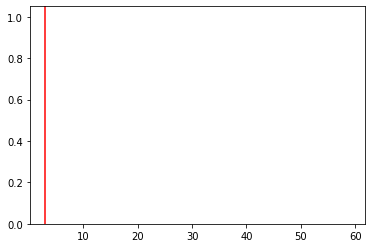

In [ ]:
blocks = filter_lotno

blocks = sorted(blocks, key = lambda x: x.coordinates[1])
    # Sort the blocks vertically from top to bottom 
distances = np.array([b2.coordinates[1] - b1.coordinates[3] for (b1, b2) in zip(blocks, blocks[1:])])
    # Calculate the distances: 
    # y coord for the upper edge of the bottom block - 
    #   y coord for the bottom edge of the upper block
    # And convert to np array for easier post processing
plt.hist(distances, bins=50);
plt.axvline(x=3, color='r');
    # Let's have some visualization 

According to the distance distribution plot, as well as the OCR results visualization, we can conclude:

- For the negative distances, it's because there are texts in the same line, e.g., "Los Angeles"
- For the small distances (indicated by the red line in the figure), they are texts in the same table row as the previous one 
- For larger distances, they are generated from texts pairs of different rows 

In [ ]:
distance_th = 0

distances = np.append([0], distances) # Append a placeholder for the first word
block_group = (distances>distance_th).cumsum() # Create a block_group based on the distance threshold 

block_group

array([ 0,  1,  2,  3,  4,  5,  6,  6,  7,  7,  8,  9,  9, 10, 11, 11, 12,
       13])

In [ ]:
# Group the blocks by the block_group mask 
grouped_blocks = [[] for i in range(max(block_group)+1)]
for i, block in zip(block_group, blocks):
    grouped_blocks[i].append(block) 

Finally let's create a function for them

In [ ]:
def group_blocks_by_distance(blocks, distance_th):

    blocks = sorted(blocks, key = lambda x: x.coordinates[1])
    distances = np.array([b2.coordinates[1] - b1.coordinates[3] for (b1, b2) in zip(blocks, blocks[1:])])

    distances = np.append([0], distances)
    block_group = (distances>distance_th).cumsum()

    grouped_blocks = [lp.Layout([]) for i in range(max(block_group)+1)]
    for i, block in zip(block_group, blocks):
        grouped_blocks[i].append(block) 
        
    return grouped_blocks

In [ ]:
A = group_blocks_by_distance(filtered_residence, 5)
B = group_blocks_by_distance(filter_lotno, 10) 

# And finally we combine the outputs 
height_th = 30
idxA, idxB = 0, 0

result = []
while idxA < len(A) and idxB < len(B):
    ay = A[idxA][0].coordinates[1]
    by = B[idxB][0].coordinates[1]
    ares, bres = ''.join(A[idxA].get_texts()), ''.join(B[idxB].get_texts())
    if abs(ay - by) < height_th:
        idxA += 1; idxB += 1
    elif ay < by:
        idxA += 1; bres = ''
    else: 
        idxB += 1; ares = ''
    result.append([ares, bres])
    
result

[['LosAngeles', 'E6037'],
 ['LosAngeles', 'E6037'],
 ['LosAngeles', 'E6037'],
 ['Oakland', '?'],
 ['RiversideCoAngelesLos', 'E5928'],
 ['', 'E6037'],
 ['BeachLong', '?E6038E5972?11'],
 ['BeachLong', ''],
 ['Maricopa', '?E5928'],
 ['FallsChurch', '8122-649334'],
 ['ChaseCity', '8122-64933?'],
 ['Houston', '7078-649343'],
 ['Scott', '7078-649342']]

As we can find, there are mistakes in the 5th and 6h row - `Riverside Co` and `LosAngeles` are wrongly combined. This is because the extra row `co` disrupted the row segmentation algorithm. 

## Save the results as a table

In [ ]:
df = pd.DataFrame(row, columns=['residence', 'lot no'])
df

,residence,lot no
0,LosAngeles,E6037
1,LosAngeles,E6037
2,LosAngeles,E6037
3,Oakland,?
4,Riverside,E5928
5,LosAngeles,E6037
6,LongBeach,?E6038
7,LongBeach,11
8,Maricopa,?E5928
9,FallsChurch,8122-649334


In [ ]:
df.to_csv(path+'data/ocred-example-table.csv', index=None)